# Part 0: Import Libraries

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn
from warnings import filterwarnings

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

# Part 1: Import Data

In [2]:
# Import data
feature = pd.read_csv(r"D:\Tony\Programming\Datasets\Yelp\yelp_feature_train.csv", encoding='utf-8')

In [3]:
feature.shape

(428724, 18)

In [4]:
feature.head(3)

,business_id,user_id,review_stars,review_like,text,text_len,restaurant_avg_stars,restaurant_review_count,city_review_count,centrality,user_avg_stars,user_review_count,user_fans,user_period,user_compliments,user_votes,popularity,pop_label
0,oj8qk3W7O9oq15VIs-vYJQ,UreiTV1I9i-XF6_bJhK6Iw,5.0,0,new favorite place breakfast first time came h...,54,4.375000,64,436.0,2.207263e-21,3.55,104,0,8,2,80,4.694428,5.0
1,YFqlMM1tFn0C4b9aHdzOgg,UreiTV1I9i-XF6_bJhK6Iw,4.0,0,nice place food good nice wines pour decent si...,54,4.448276,29,839.0,2.207263e-21,3.55,104,0,8,2,80,4.367999,5.0
2,YFqlMM1tFn0C4b9aHdzOgg,UreiTV1I9i-XF6_bJhK6Iw,4.0,0,nice place food good nice wines pour decent si...,42,4.448276,29,839.0,2.207263e-21,3.55,104,0,8,2,80,4.367999,5.0


# Part 2: Feature Engineering

### Group by restaurants

In [5]:
feature['count'] = 1
res_feature = feature.groupby(['business_id']).agg({'review_stars':'mean', 'count':'sum', 'pop_label':'mean'})

In [6]:
res_feature.head(3)

,review_stars,count,pop_label
business_id,,,
--9e1ONYQuAa-CB_Rrw7Tw,4.295082,183,5.0
--FBCX-N37CMYDfs790Bnw,4.047619,21,4.0
--I7YYLada0tSLkORTHb5Q,3.526316,19,3.0


In [7]:
len(res_feature[res_feature['pop_label'] == 1]), len(res_feature[res_feature['pop_label'] == 2]), \
len(res_feature[res_feature['pop_label'] == 3]), len(res_feature[res_feature['pop_label'] == 4]), \
len(res_feature[res_feature['pop_label'] == 5])

(3444, 3268, 3115, 3683, 3561)

### Define X-train and y-train

In [8]:
X_train = res_feature[['review_stars', 'count']]
y_train = res_feature['pop_label'].astype(int)

### Scale features

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Part 3: Simple Regression

In [10]:
reg = LogisticRegression(max_iter=1000, random_state=0)
reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Part 4: Model Validation

### Import test data

In [11]:
# import data
test = pd.read_csv(r"D:\Tony\Programming\Datasets\Yelp\yelp_feature_test.csv", encoding='utf-8')
test['count'] = 1
res_test = test.groupby(['business_id']).agg({'review_stars':'mean', 'count':'sum', 'pop_label':'mean'})

# define X and y
X_test = res_test[['review_stars', 'count']]
y_test = res_test['pop_label'].astype(int)

# scale feature
X_test = scaler.transform(X_test)

### Predict test data

In [12]:
pred = reg.predict(X_test)

### Test accuracy

In [13]:
# Calculate accuracy
acc = accuracy_score(y_test, pred)

# Calculate RMSE
rmse = (mean_squared_error(y_test, pred))**(0.5)

print("acc:\t", round(acc,4))
print("RMSE:\t", round(rmse,4))

acc:	 0.4461
RMSE:	 1.2063


### Baseline accuracy

In [14]:
base_acc = accuracy_score(y_test, np.repeat(3, len(y_test)))
base_rmse = (mean_squared_error(y_test, np.repeat(3, len(y_test))))**(0.5)
print("baseline acc:\t", round(base_acc,4))
print("baseline RMSE:\t", round(base_rmse,4))

baseline acc:	 0.1938
baseline RMSE:	 1.4208


### Confusion matrix

Text(0.5, 1, 'Confusion Matrix')

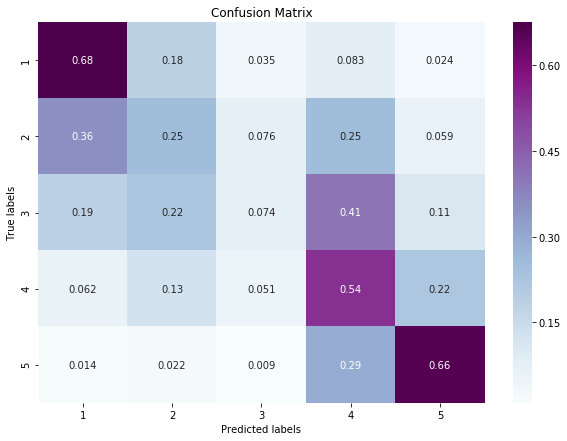

In [15]:
labels = [1,2,3,4,5]
cm = confusion_matrix(y_test, pred, labels, normalize='true')
cm_df = pd.DataFrame(cm, index=[i for i in labels], columns=[i for i in labels])

plt.figure(figsize = (10,7))
ax = plt.subplot()
sn.heatmap(cm_df, annot=True, cmap='BuPu', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')